
# **Early Prediction for Chronic Kidney Disease Detection: A Progressive Approach to Health Management**

# **Problem statement:**

# **Dataset Collection**

> Dataset path : /content/kidney_disease.csv


> **Prachi Phunde**





In [ ]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
data=pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# **Data Pre-Processing**


> **Prachi Phunde, Asmita Amrute, Raunak Singh**







In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns=[
    'id', 'age', 'blood_pressure', 'specific_gravity', 'albumin',
    'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
    'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
    'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite',
    'pedal_edema', 'anemia', 'class']

data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
data['class'][230] = 'ckd'
data['class'][37] = 'ckd'

/tmp/ipython-input-80-474906854.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['class'][230] = 'ckd'
/tmp/ipython-input-80-474906854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [ ]:
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [ ]:
data.isnull().any()

,0
id,False
age,True
blood_pressure,True
specific_gravity,True
albumin,True
sugar,True
red_blood_cells,True
pus_cell,True
pus_cell_clumps,True
bacteria,True


In [ ]:
# Convert string columns to numeric safely
data['blood_glucose_random'] = pd.to_numeric(data['blood_glucose_random'], errors='coerce')
data['blood_glucose_random'] = data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean())

data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'] = data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean())

data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['white_blood_cell_count'] = data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean())

data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['packed_cell_volume'] = data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean())

In [ ]:
# Fill numeric NaNs
data['blood_glucose_random'] = data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean())
data['blood_pressure'] = data['blood_pressure'].fillna(data['blood_pressure'].mean())
data['blood_urea'] = data['blood_urea'].fillna(data['blood_urea'].mean())
data['hemoglobin'] = data['hemoglobin'].fillna(data['hemoglobin'].mean())
data['serum_creatinine'] = data['serum_creatinine'].fillna(data['serum_creatinine'].mean())
data['sodium'] = data['sodium'].fillna(data['sodium'].mean())
data['potassium'] = data['potassium'].fillna(data['potassium'].mean())
data['packed_cell_volume'] = data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean())
data['red_blood_cell_count'] = data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean())
data['white_blood_cell_count'] = data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean())

In [ ]:
data['age'] = data['age'].fillna(data['age'].mode()[0])
data['hypertension'] = data['hypertension'].fillna(data['hypertension'].mode()[0])
data['pus_cell_clumps'] = data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0])
data['appetite'] = data['appetite'].fillna(data['appetite'].mode()[0])
data['albumin'] = data['albumin'].fillna(data['albumin'].mode()[0])
data['pus_cell'] = data['pus_cell'].fillna(data['pus_cell'].mode()[0])
data['red_blood_cells'] = data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0])
data['coronary_artery_disease'] = data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0])
data['bacteria'] = data['bacteria'].fillna(data['bacteria'].mode()[0])
data['anemia'] = data['anemia'].fillna(data['anemia'].mode()[0])
data['sugar'] = data['sugar'].fillna(data['sugar'].mode()[0])
data['diabetesmellitus'] = data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0])
data['pedal_edema'] = data['pedal_edema'].fillna(data['pedal_edema'].mode()[0])
data['specific_gravity'] = data['specific_gravity'].fillna(data['specific_gravity'].mode()[0])

In [ ]:
data.isnull().sum()

,0
id,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0


In [ ]:
data['red_blood_cell_count'] = data['red_blood_cell_count'].astype('object')
data['white_blood_cell_count'] = data['white_blood_cell_count'].astype('object')
data['packed_cell_volume'] = data['packed_cell_volume'].astype('object')

In [ ]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'appetite', 'packed_cell_volume', 'coronary_artery_disease', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus', 'bacteria', 'pedal_edema', 'anemia', 'pus_cell', 'white_blood_cell_count', 'pus_cell_clumps', 'class', 'red_blood_cells'}


In [ ]:
for i in catcols:
  print("Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

Columns: appetite
Counter({'good': 318, 'poor': 82})
************************************************************************************************************************

Columns: packed_cell_volume
Counter({38.88449848024316: 71, 52.0: 21, 41.0: 21, 44.0: 19, 48.0: 19, 40.0: 16, 43.0: 15, 45.0: 13, 42.0: 13, 32.0: 12, 36.0: 12, 33.0: 12, 28.0: 12, 50.0: 12, 37.0: 11, 34.0: 11, 35.0: 9, 29.0: 9, 30.0: 9, 46.0: 9, 31.0: 8, 39.0: 7, 24.0: 7, 26.0: 6, 38.0: 5, 47.0: 4, 49.0: 4, 53.0: 4, 51.0: 4, 54.0: 4, 27.0: 3, 22.0: 3, 25.0: 3, 23.0: 2, 19.0: 2, 16.0: 1, 14.0: 1, 18.0: 1, 17.0: 1, 15.0: 1, 21.0: 1, 20.0: 1, 9.0: 1})
************************************************************************************************************************

Columns: coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
************************************************************************************************************************

Columns: red_blood_cell_count
Counter({4.70743494423

In [ ]:
count = 0
for i in data['coronary_artery_disease']:
  if i == '\tno':
      print(i)
      data['coronary_artery_disease'][count] = 'no'
  count = count+1;

count = 0
for i in data['diabetesmellitus']:
  if i == '\tno':
      print(i)
      data['diabetesmellitus'][count] = 'no'
  count = count+1;

count = 0
for i in data['diabetesmellitus']:
  if i == '\tyes':
      print(i)
      data['diabetesmellitus'][count] = 'yes'
  elif(i == ' yes'):
      print(i)
      data['diabetesmellitus'][count] = 'yes'
  count = count+1

	no
	no
	no
	no
	no
 yes
	yes
	yes


/tmp/ipython-input-91-3097276342.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['coronary_artery_disease'][count] = 'no'
/tmp/ipython-input-91-3097276342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [ ]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'appetite', 'coronary_artery_disease', 'hypertension', 'diabetesmellitus', 'bacteria', 'pedal_edema', 'anemia', 'pus_cell', 'pus_cell_clumps', 'class', 'red_blood_cells'}


# **Labeling Encoding of Categorical Column**

In [ ]:
catcols={'anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells'}

In [ ]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF:", i)
  LEi=LabelEncoder()
  print(c(data[i]))
  data[i]=LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter({'no': 366, 'yes': 34})
Counter({0: 366, 1: 34})
****************************************************************************************************
LABEL ENCODING OF: diabetesmellitus
Counter({'no': 263, 'yes': 137})
Counter({0: 263, 1: 137})
****************************************************************************************************
LABEL ENCODING OF: hypertension
Counter({'no': 253, 'yes': 147})
Counter({0: 253, 1: 147})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: pedal

In [ ]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'appetite', 'blood_glucose_random', 'specific_gravity', 'id', 'serum_creatinine', 'sugar', 'sodium', 'diabetesmellitus', 'class', 'red_blood_cells', 'potassium', 'coronary_artery_disease', 'blood_pressure', 'pedal_edema', 'albumin', 'pus_cell_clumps', 'hemoglobin', 'blood_urea', 'hypertension', 'bacteria', 'anemia', 'age', 'pus_cell'}


In [ ]:
for i in contcols:
  print("Continuous Columns : ", i)
  print(c(data[i]))
  print('*'*120+'\n')

Continuous Columns :  appetite
Counter({0: 318, 1: 82})
************************************************************************************************************************

Continuous Columns :  blood_glucose_random
Counter({148.0365168539326: 44, 99.0: 10, 100.0: 9, 93.0: 9, 107.0: 8, 117.0: 6, 140.0: 6, 92.0: 6, 109.0: 6, 131.0: 6, 130.0: 6, 70.0: 5, 114.0: 5, 95.0: 5, 123.0: 5, 124.0: 5, 102.0: 5, 132.0: 5, 104.0: 5, 125.0: 5, 122.0: 5, 121.0: 4, 106.0: 4, 76.0: 4, 91.0: 4, 129.0: 4, 133.0: 4, 94.0: 4, 88.0: 4, 118.0: 4, 139.0: 4, 111.0: 4, 113.0: 4, 120.0: 4, 119.0: 4, 74.0: 3, 108.0: 3, 171.0: 3, 137.0: 3, 79.0: 3, 150.0: 3, 112.0: 3, 127.0: 3, 219.0: 3, 172.0: 3, 89.0: 3, 128.0: 3, 214.0: 3, 105.0: 3, 78.0: 3, 103.0: 3, 82.0: 3, 97.0: 3, 81.0: 3, 138.0: 2, 490.0: 2, 208.0: 2, 98.0: 2, 204.0: 2, 207.0: 2, 144.0: 2, 253.0: 2, 141.0: 2, 86.0: 2, 360.0: 2, 163.0: 2, 158.0: 2, 165.0: 2, 169.0: 2, 210.0: 2, 101.0: 2, 153.0: 2, 213.0: 2, 424.0: 2, 303.0: 2, 192.0: 2, 80.0: 2, 110.0

In [ ]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'appetite', 'blood_glucose_random', 'id', 'serum_creatinine', 'sodium', 'diabetesmellitus', 'class', 'red_blood_cells', 'potassium', 'coronary_artery_disease', 'blood_pressure', 'pedal_edema', 'pus_cell_clumps', 'hemoglobin', 'blood_urea', 'hypertension', 'bacteria', 'anemia', 'age', 'pus_cell'}


In [ ]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
contcols

{'age',
 'anemia',
 'appetite',
 'bacteria',
 'blood_glucose_random',
 'blood_pressure',
 'blood_urea',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hemoglobin',
 'hypertension',
 'id',
 'packed_cell_volume',
 'pedal_edema',
 'potassium',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cell_count',
 'red_blood_cells',
 'serum_creatinine',
 'sodium',
 'white_blood_cell_count'}

In [ ]:
contcols.remove('appetite')
contcols.remove('anemia')
contcols.remove('bacteria')
contcols.remove('class')
contcols.remove('coronary_artery_disease')
contcols.remove('diabetesmellitus')
contcols.remove('hypertension')
contcols.remove('pus_cell')
contcols.remove('pus_cell_clumps')
contcols.remove('red_blood_cells')
contcols.remove('id')
contcols.remove('pedal_edema')
print(contcols)

{'blood_glucose_random', 'serum_creatinine', 'sodium', 'potassium', 'packed_cell_volume', 'blood_pressure', 'white_blood_cell_count', 'hemoglobin', 'blood_urea', 'red_blood_cell_count', 'age'}


In [ ]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'appetite', 'coronary_artery_disease', 'diabetesmellitus', 'hypertension', 'bacteria', 'pedal_edema', 'specific_gravity', 'anemia', 'pus_cell', 'albumin', 'sugar', 'pus_cell_clumps', 'class', 'red_blood_cells'}


In [ ]:
# data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace({r'\\tno': 'no'}, regex=True)
c(data['coronary_artery_disease'])

Counter({0: 366, 1: 34})

In [ ]:
data['diabetesmellitus'] = data['diabetesmellitus'].replace(to_replace={r'\\tno': 'no', r'\\tyes': 'yes', 'yes ': 'yes'}, regex=True)
c(data['diabetesmellitus'])

Counter({1: 137, 0: 263})

# **Descriptive Statistical Analysis**


> **Asmita Amrute, Amisha Singh, Raunak Singh**



In [ ]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,sodium,potassium,hemoglobin,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,137.528754,4.627244,12.526437,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,9.204273,2.819783,2.716171,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,2.500000,3.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,135.000000,4.000000,10.875000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,137.528754,4.627244,12.526437,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,141.000000,4.800000,14.625000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,163.000000,47.000000,17.800000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Visual Analysis**


> **Asmita Amrute, Prachi Phunde, Raunak Singh**



Age distribution

/tmp/ipython-input-104-4156840497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

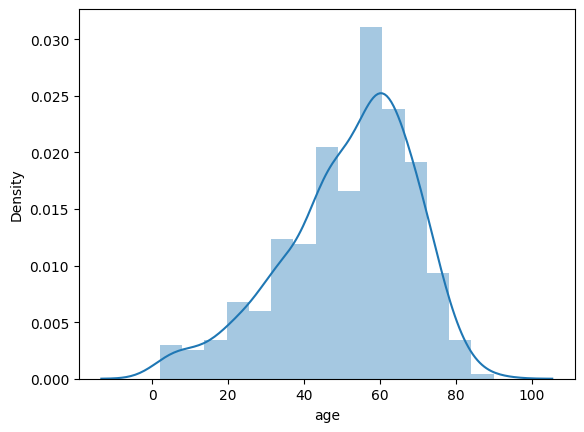

In [ ]:
sns.distplot(data.age)

Age vs Blood Pressure

Text(0.5, 1.0, 'Age vs Blood scatter Plot')

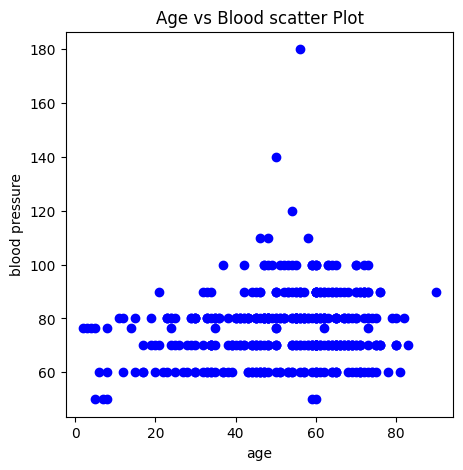

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'], data['blood_pressure'], color='blue')
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title("Age vs Blood scatter Plot")

Age vs all continous columns

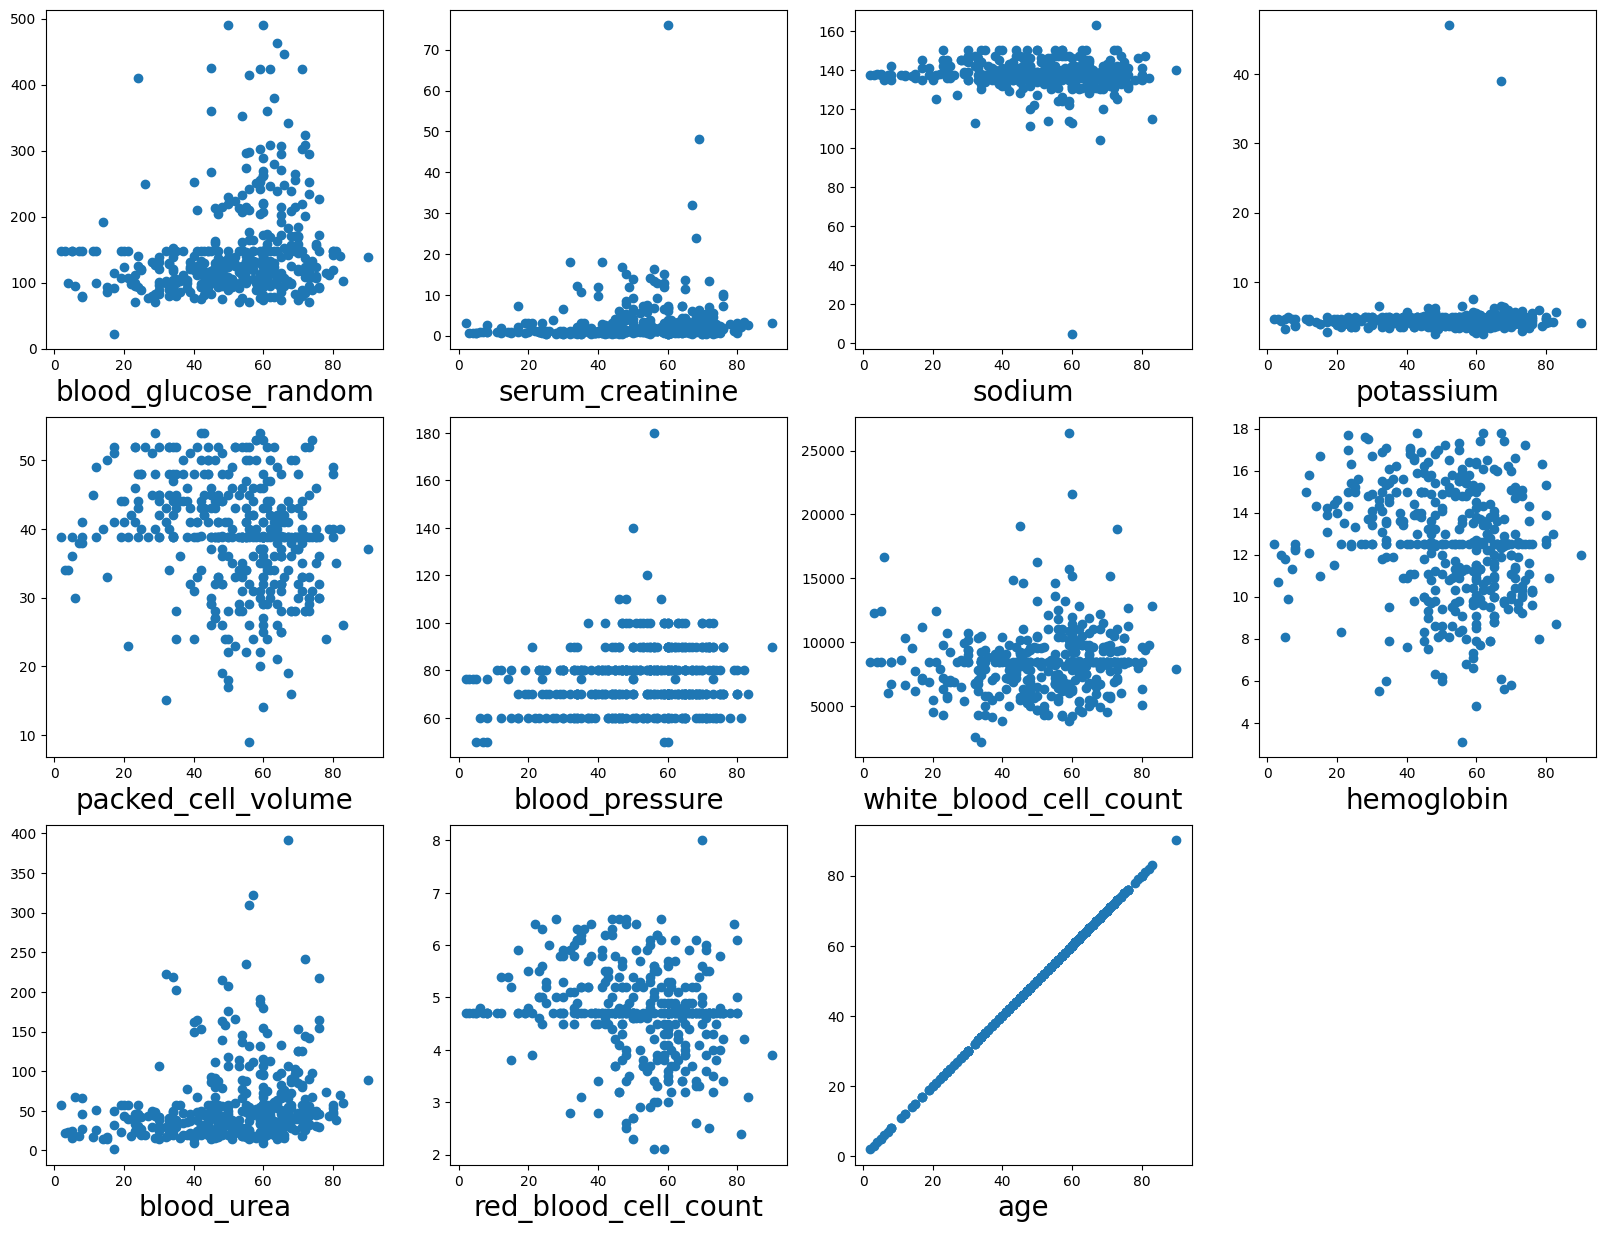

In [ ]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
  if plotnumber<=11:
     ax = plt.subplot(3,4,plotnumber)
     plt.scatter(data['age'],data[column])
     plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()

Finding correlation between the independent columns

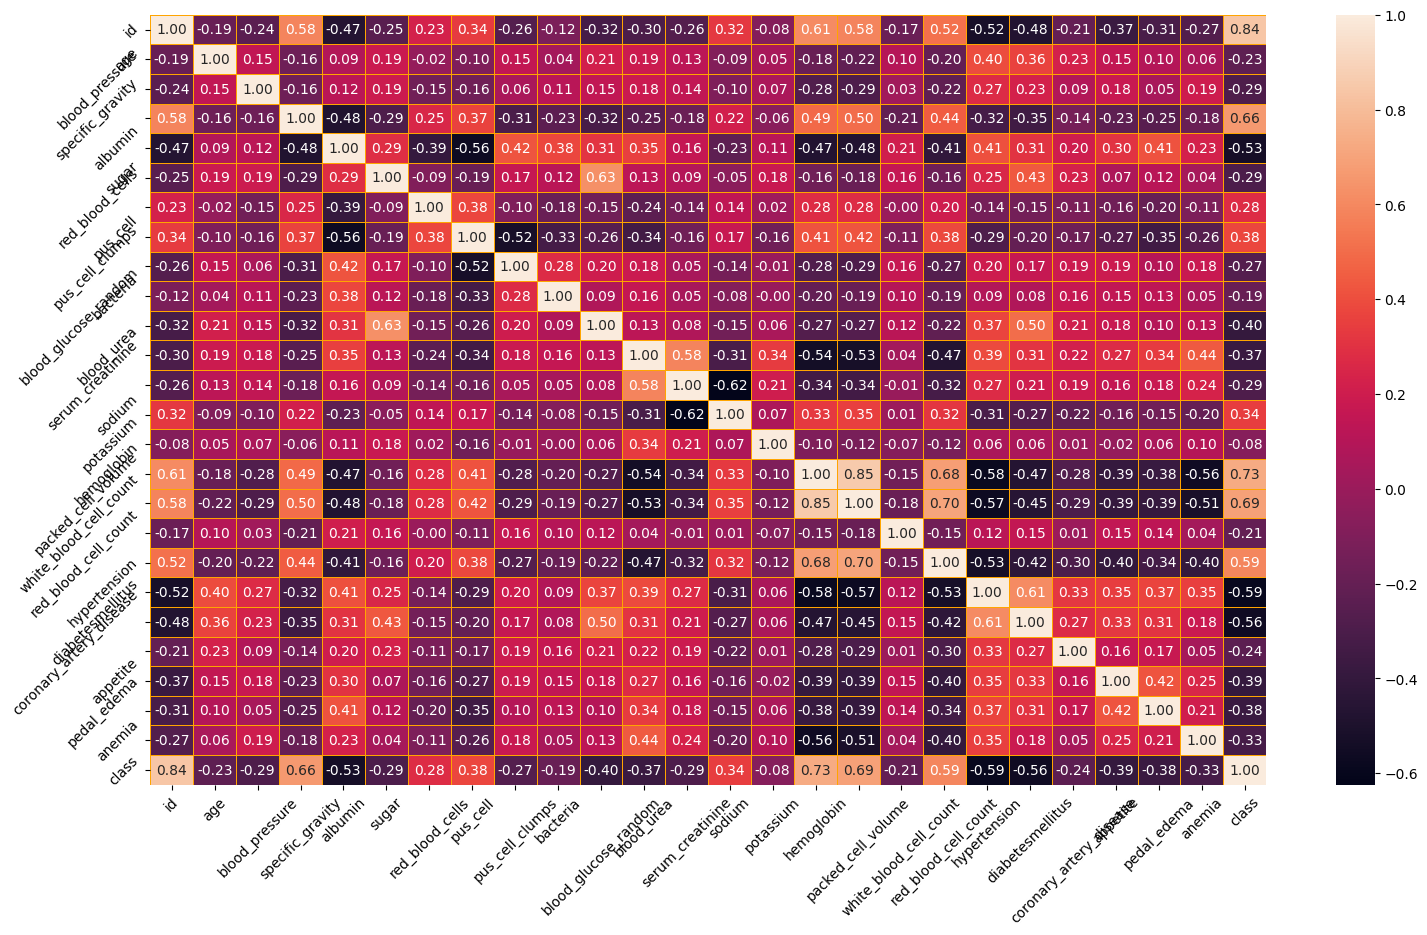

In [ ]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, linewidths=0.5, linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: xlabel='class', ylabel='count'>

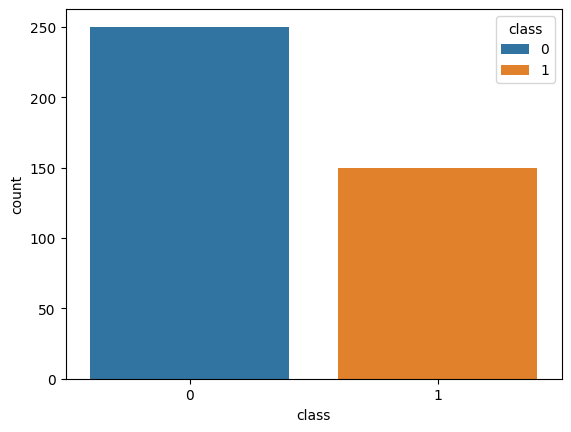

In [ ]:
sns.countplot(data, x='class', hue='class')

### **Creating independent and dependent**



In [ ]:
selcols=['red_blood_cells', 'pus_cell', 'blood_glucose_random', 'blood_urea', 'pedal_edema', 'anemia', 'diabetesmellitus', 'coronary_artery_disease']
x=pd.DataFrame(data, columns=selcols)
y=pd.DataFrame(data, columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


### **Splitting the data into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)

# **Training The Model In Multiple Algorithms**


> **Asmita Amrute, Raunak Singh**



In [ ]:
#importing the keras liberies and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ANN Model

In [ ]:
#creating ANN skleton view
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [ ]:
#compilling the ANN model
classification.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#training the model
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5906 - loss: 2.0566 - val_accuracy: 0.6389 - val_loss: 0.7005
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6439 - loss: 0.6604 - val_accuracy: 0.6111 - val_loss: 0.6108
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6629 - loss: 0.5741 - val_accuracy: 0.6111 - val_loss: 0.8227
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6359 - loss: 0.6448 - val_accuracy: 0.7083 - val_loss: 0.5154
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6712 - loss: 0.5579 - val_accuracy: 0.7639 - val_loss: 0.4875
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6851 - loss: 0.4858 - val_accuracy: 0.6111 - val_loss: 0.4983
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6337 - loss: 0.5512 - val_accuracy: 0.6111 - val_loss: 0.5300
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6792 - loss: 0.5330 - val_accuracy: 0.7361 - 

In [ ]:
y_pred_ann = classification.predict(x_test)
y_pred_ann

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[8.9088929e-01],
       [9.2579085e-01],
       [8.8400726e-04],
       [2.0547246e-16],
       [2.5767898e-15],
       [0.0000000e+00],
       [8.5997248e-01],
       [7.5085231e-06],
       [4.9421602e-01],
       [1.6986851e-21],
       [2.2751685e-26],
       [7.6491994e-01],
       [4.6037335e-36],
       [9.0771796e-10],
       [2.8405371e-26],
       [7.5620305e-06],
       [9.6033847e-01],
       [7.8470385e-01],
       [3.8841356e-13],
       [8.7336940e-01],
       [3.9420513e-07],
       [1.2711651e-36],
       [7.7957559e-01],
       [8.5032803e-01],
       [8.0374070e-03],
       [9.1462260e-01],
       [5.0162477e-04],
       [6.1591504e-17],
       [6.8610704e-01],
       [3.7489942e-11],
       [9.4161069e-01],
       [0.0000000e+00],
       [9.2253453e-01],
       [7.5173461e-35],
       [1.8781350e-08],
       [4.5275444e-04],
       [5.4128918e-07],
       [9.2426831e-01],
       [9.5709056e-15],
       [7.8752660e-10]], dtype=float32)

In [ ]:
y_pred_ann = (y_pred_ann > 0.5)
y_pred_ann

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False]])

Ramdom Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')

In [ ]:
rfc.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

Confusion matrix for Random Forest

In [ ]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_rfc

array([[25,  1],
       [ 1, 13]])

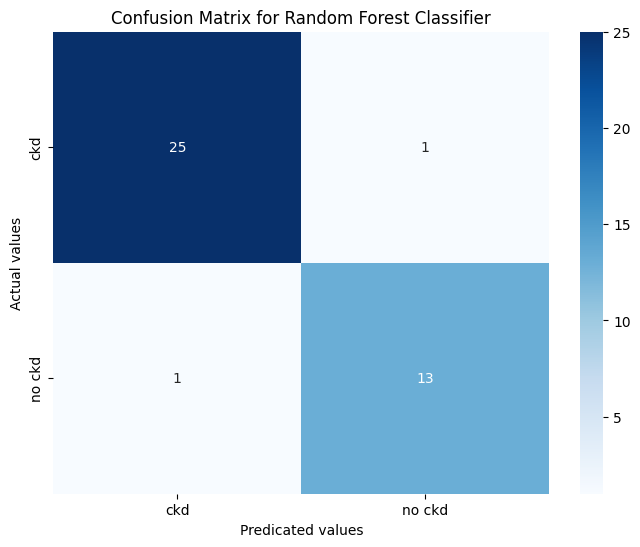

In [ ]:
#plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_rfc, cmap='Blues', annot=True, xticklabels=['ckd', 'no ckd'], yticklabels=['ckd', 'no ckd'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [ ]:
cr_rfc = classification_report(y_test, y_pred_rfc)
print(f'Random Forest Classification Report: \n\n{cr_rfc}')

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.93      0.93      0.93        14

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
accuracy_score(y_test,y_pred_rfc)

0.95

# **95% Accuracy of Random Forest Classifier**

Decision Tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred_dtc = dtc.predict(x_test)
y_pred_dtc

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

Confusion matrix for Random Forest

In [ ]:
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[25,  1],
       [ 0, 14]])

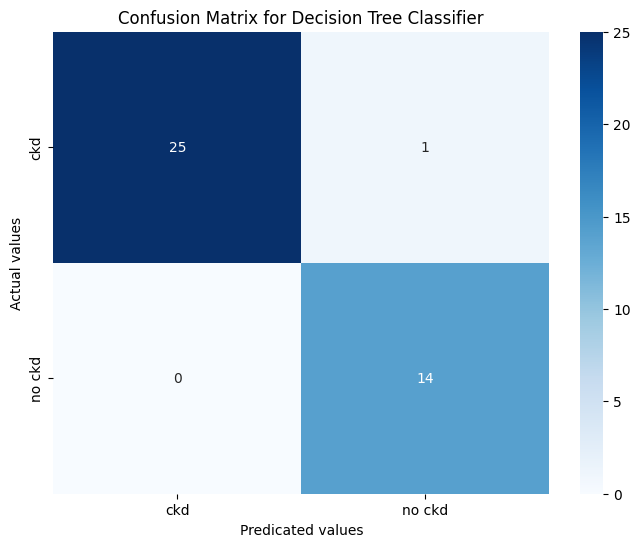

In [ ]:
#plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_dtc, cmap='Blues', annot=True, xticklabels=['ckd', 'no ckd'], yticklabels=['ckd', 'no ckd'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [ ]:
cr_dtc = classification_report(y_test, y_pred_dtc)
print(f'Decision Tree Classification Report: \n\n{cr_dtc}')

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.93      1.00      0.97        14

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [ ]:
accuracy_score(y_test,y_pred_dtc)

0.975

# **97.5% Accuracy of Decision Tree Classifier**

logistic Regression

In [ ]:
x_train.isnull().sum()

,0
red_blood_cells,0
pus_cell,0
blood_glucose_random,0
blood_urea,0
pedal_edema,0
anemia,0
diabetesmellitus,0
coronary_artery_disease,0


In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Predicting our output ith the model which we build

In [ ]:
y_pred_lgr = lgr.predict(x_test)
y_pred_lgr

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
cm_lgr = confusion_matrix(y_test, y_pred_lgr)
cm_lgr

array([[26,  0],
       [ 0, 14]])

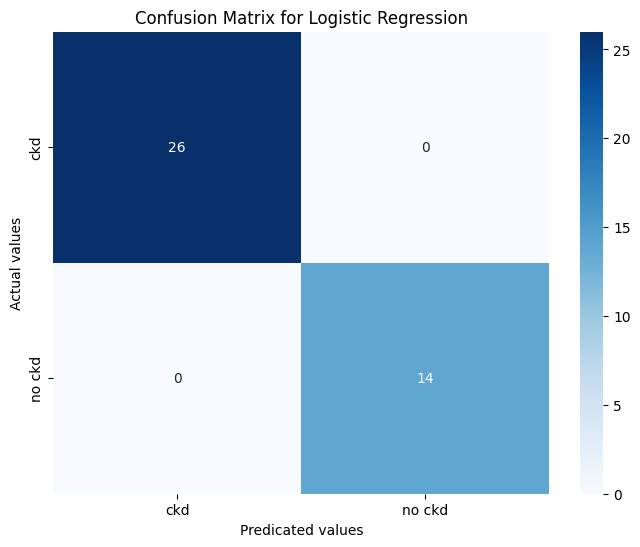

In [ ]:
#plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_lgr, cmap='Blues', annot=True, xticklabels=['ckd', 'no ckd'], yticklabels=['ckd', 'no ckd'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
cr_lgr = classification_report(y_test, y_pred_lgr)
print(f'Logistic Regression Classification Report: \n\n{cr_lgr}')

Logistic Regression Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
accuracy_score(y_test,y_pred_lgr)

1.0

# **100% Accuracy of Logistic Regression Model**



# **Testing the model**

In [ ]:
classification.save("ckd.h5")

In [ ]:
#testing the model
y_pred = classification.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
y_pred

array([[8.9088929e-01],
       [9.2579085e-01],
       [8.8400726e-04],
       [2.0547246e-16],
       [2.5767898e-15],
       [0.0000000e+00],
       [8.5997248e-01],
       [7.5085231e-06],
       [4.9421602e-01],
       [1.6986851e-21],
       [2.2751685e-26],
       [7.6491994e-01],
       [4.6037335e-36],
       [9.0771796e-10],
       [2.8405371e-26],
       [7.5620305e-06],
       [9.6033847e-01],
       [7.8470385e-01],
       [3.8841356e-13],
       [8.7336940e-01],
       [3.9420513e-07],
       [1.2711651e-36],
       [7.7957559e-01],
       [8.5032803e-01],
       [8.0374070e-03],
       [9.1462260e-01],
       [5.0162477e-04],
       [6.1591504e-17],
       [6.8610704e-01],
       [3.7489942e-11],
       [9.4161069e-01],
       [0.0000000e+00],
       [9.2253453e-01],
       [7.5173461e-35],
       [1.8781350e-08],
       [4.5275444e-04],
       [5.4128918e-07],
       [9.2426831e-01],
       [9.5709056e-15],
       [7.8752660e-10]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False]])

In [ ]:
def predict_exit(sample_value):

  #convert list to numpy array
  sample_value = np.array(sample_value)

  #reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  #feature scaling
  sample_value = sc.transform(sample_value)
  return classifier.predict(sample_value)

In [ ]:
import numpy as np

test = classification.predict(np.array([[1,1,121.000000,36.0,0,0,1,0]]))
if test==1:
  print('Prediction: High chance of CKD!')
else:
  print('Prediction: Low chance of CKD.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: Low chance of CKD.


# **Save the Best Model**


> **Raunak Singh, Asmita Amrute**


> Logistic Regression Model is the best Model and has the highest accuracy of ***100%***



In [ ]:
pickle.dump(lgr, open('CKD.pkl','wb'))

# **Integrate with Web Framework**


> **Asmita Amrute, Prachi Phunde, Raunak Singh**

